In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import io

# Loading in data + discovery

In [4]:
raiders_data = pd.read_csv("raiders.csv")
rams_data = pd.read_csv('rams.csv')
chargers_data = pd.read_csv('chargers.csv')

In [5]:
# examining data
raiders_data = pd.DataFrame(raiders_data)
raiders_data.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Points,Points.1,...,Def Rank.1,Overall Rank,Overall Rank.1,Overall Rank.2,Overall Rank.3,Simple Rating System,Simple Rating System.1,Simple Rating System.2,Simple Rating System.3,Simple Rating System.4
0,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,...,Yds,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1994,NFL,Los Angeles Raiders,9,7,0,3rd of 5,NaN,303,327,...,10,22,15,14,28,-1.5,-0.1,-1.6,-1.9,0.3
3,1993,NFL,Los Angeles Raiders*,10,6,0,2nd of 5,Lost Div,306,326,...,9,18,18,10,28,-1.3,0.6,-0.7,1.1,-1.7
4,1992,NFL,Los Angeles Raiders,7,9,0,4th of 5,NaN,249,281,...,9,28,15,14,28,-2.0,0.4,-1.6,-3.2,1.5


In [6]:
# Getting first (0th) row of the "Unnamed: 0" col
raiders_data.loc[0, 'Unnamed: 0']

'Year'

All the NFL data has corrupted column names and corrupted first row values as a result

# Fixing and Aggregating NFL datasets

## Fixing Column Names


In [7]:
# range function specifies the amount of time to run the loop for col number
for i in range(raiders_data.shape[1]):
    col = raiders_data.columns[i]
    raiders_data.rename(columns = {col: raiders_data.loc[0,col]}, inplace = True)

# getting rid of the first 2 rows
raiders_data.drop([raiders_data.index[0], raiders_data.index[1]], inplace = True)

raiders_data.head(5)

,Year,Lg,Tm,W,L,T,Div. Finish,Playoffs,PF,PA,...,Yds,T/G,Pts±,Yds±,out of,MoV,SoS,SRS,OSRS,DSRS
2,1994,NFL,Los Angeles Raiders,9,7,0,3rd of 5,NaN,303,327,...,10,22,15,14,28,-1.5,-0.1,-1.6,-1.9,0.3
3,1993,NFL,Los Angeles Raiders*,10,6,0,2nd of 5,Lost Div,306,326,...,9,18,18,10,28,-1.3,0.6,-0.7,1.1,-1.7
4,1992,NFL,Los Angeles Raiders,7,9,0,4th of 5,NaN,249,281,...,9,28,15,14,28,-2.0,0.4,-1.6,-3.2,1.5
5,1991,NFL,Los Angeles Raiders*,9,7,0,3rd of 5,Lost WC,298,297,...,21,11,15,24,28,0.1,1.3,1.4,0.3,1.1
6,1990,NFL,Los Angeles Raiders*,12,4,0,1st of 5,Lost Conf,337,268,...,4,14,9,13,28,4.3,2.2,6.6,2.2,4.4


## Creating a column_fixer function

In [8]:
def column_fixer(data):
    # range function specifies the amount of time to run the loop for col number
    for i in range(data.shape[1]):
        col = data.columns[i]
        data.rename(columns = {col: data.loc[0,col]}, inplace = True)

    # getting rid of the first 2 rows
    data.drop([data.index[0], data.index[1]], inplace = True)

In [9]:
# applying function to other NFL datasets
column_fixer(chargers_data)
column_fixer(rams_data)

## Aggregating all NFL data together into singular dataframe

In [10]:
# adding 'team' label
raiders_data['Team'] = 'Raiders'
chargers_data['Team'] = 'Chargers'
rams_data['Team'] = 'Rams'

In [17]:
# merging nfl datasets
nfl_data = pd.merge(
    raiders_data, chargers_data, how = 'outer'
)

nfl_data.shape

MergeError: Data columns not unique: Index(['Year', 'Lg', 'Tm', 'W', 'L', 'T', 'Div. Finish', 'Playoffs', 'PF',
       'PA', 'PD', 'Coaches', 'AV', 'Passer', 'Rusher', 'Receiver', 'Pts',
       'Yds', 'Pts', 'Yds', 'T/G', 'Pts±', 'Yds±', 'out of', 'MoV', 'SoS',
       'SRS', 'OSRS', 'DSRS', 'Team'],
      dtype='object')

# Loading in CFB data

In [13]:
ucla_data = pd.read_csv("ucla.csv")
usc_data = pd.read_csv('usc.csv')

In [14]:
# adding 'team' label
ucla_data['Team'] = 'UCLA'
usc_data['Team'] = 'USC'

In [15]:
# merging ucla & usc datasets
ucla_and_usc = pd.merge(
    ucla_data, usc_data, how = 'outer'
)

ucla_and_usc.shape

(197, 19)

In [10]:
# exporting ucla and usc to csv
ucla_and_usc.to_csv( "ucla_and_usc.csv", index=False, encoding='utf-8-sig')

(2000, 2021)

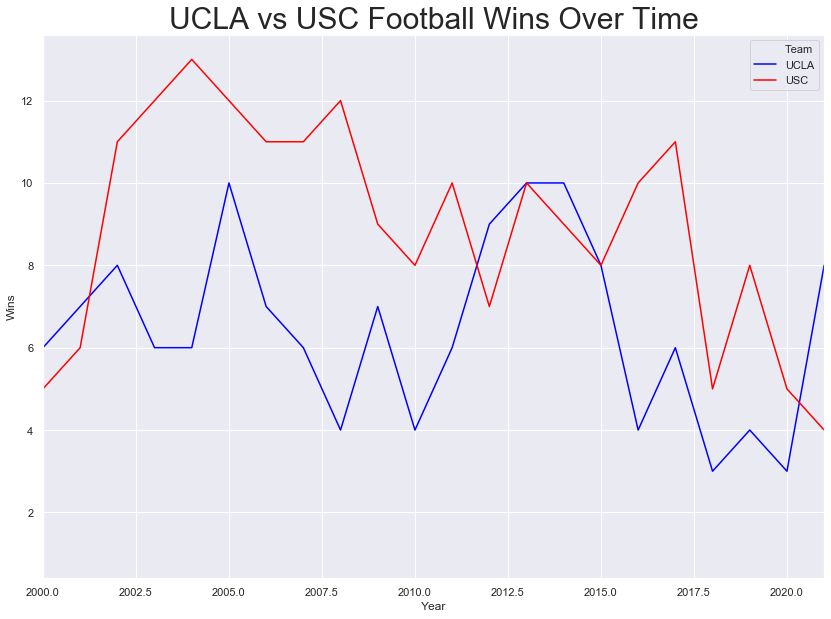

In [11]:
# Setting a large size for future plots (width x height)
sns.set(rc = {'figure.figsize':(14,10)})

usc_vs_ucla_wins = sns.lineplot(
    'Year', 'Overall W', data = ucla_and_usc, 
    hue='Team', palette = ['blue', 'red']
    ).set_title("UCLA vs USC Football Wins Over Time", fontsize=30
)

plt.ylabel('Wins')
plt.xlim(2000, 2021)